In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs
# make_classification is used for making dummy data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
X,y = make_classification(n_samples=500,n_features=2,n_informative=2,n_redundant=0,random_state=42)

# random_state is used for duplicacy of result

In [17]:
X.shape

(500, 2)

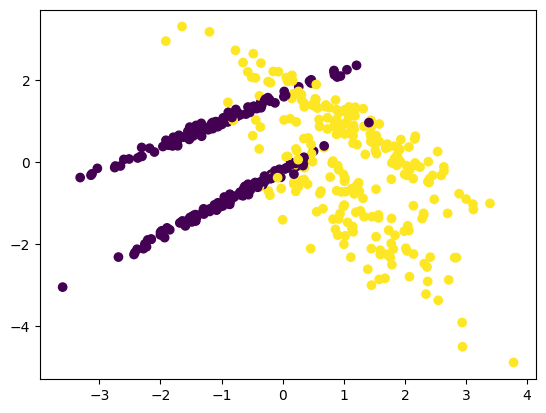

In [18]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [19]:
class LogisticRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
        
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return self.sigmoid(w.dot(x.T) + w0)

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
        

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return -np.sum(y*np.log2(ypred) + (1-y)*np.log2(1-ypred))

    def predict(self,X):
        ypred = self.hypothesis(X,self.w,self.w0)
        ypred[ypred >= 0.5] = 1
        ypred[ypred < 0.5] = 0
        return ypred

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w0 = 1
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            grads = grads = (ypred-y)@X
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0


In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [23]:
clf = LogisticRegression(lr = 0.01)
clf.fit(x_train,y_train,2000)

In [24]:
ypred = clf.predict(x_train)
print(accuracy_score(y_train,ypred))

0.8775


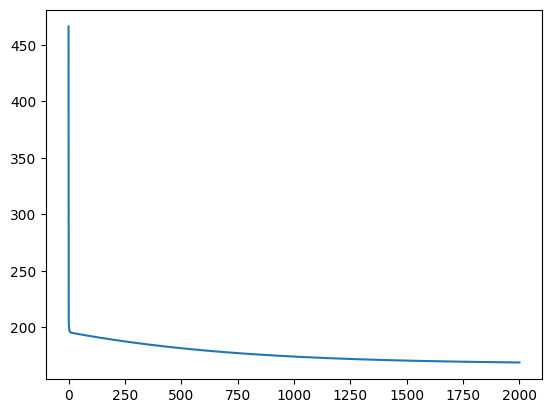

In [25]:
plt.plot(clf.loss_e)
plt.show()

In [30]:
clf = LogisticRegression()
clf.fit(x_train,y_train,100)

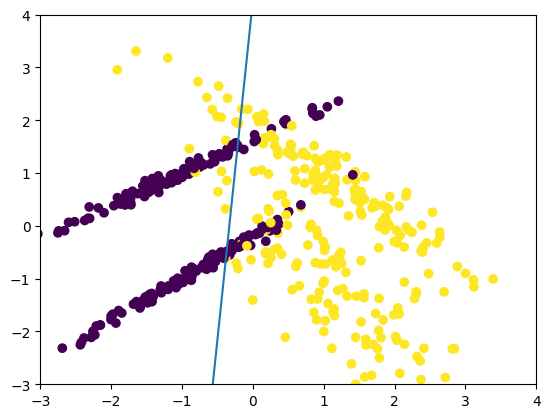

In [31]:
 
x1 = np.linspace(-3,4,1000)
x2 = -(clf.w[0]*x1+clf.w0)/clf.w[1]
plt.plot(x1,x2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim(-3,4)
plt.ylim(-3,4)
plt.show()